# Optimising IO through asynchronous transfers



In [139]:
import os
import sys
import numpy as np
import subprocess
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
sys.path.insert(0, os.path.abspath("../include"))

import py_helper

%matplotlib widget

float_type = np.float32

defines=py_helper.load_defines("mat_size.hpp")

# Velocity of the medium
vel=333.0

# Make up the velocity and first two timesteps
V=np.ones((defines["N0"], defines["N1"]), dtype=float_type)*vel

# write files to disk
V.tofile("array_V.dat")

In [140]:
# Run the application under Tau
subprocess.run(os.path.join(os.getcwd(),"wave2d_async.exe"))

	               name: Intel(R) FPGA Emulation Device 
	 global memory size: 32880 MB
	    max buffer size: 16440 MB
	     max local size: (67108864,67108864,67108864)
	     max work-items: 67108864
dt=0.000300, Vmax=333.000000


CompletedProcess(args='/home/toby/Pelagos/Projects/OpenCL_Course/course_material/L9_Asynchronous_IO/wave2d_async.exe', returncode=0)

In [141]:
# Read the outputfile back in for display
output=np.fromfile("array_out.dat", dtype=float_type)
nslices=output.size//(defines["N0"]*defines["N1"])
output=output.reshape(nslices, defines["N0"], defines["N1"])

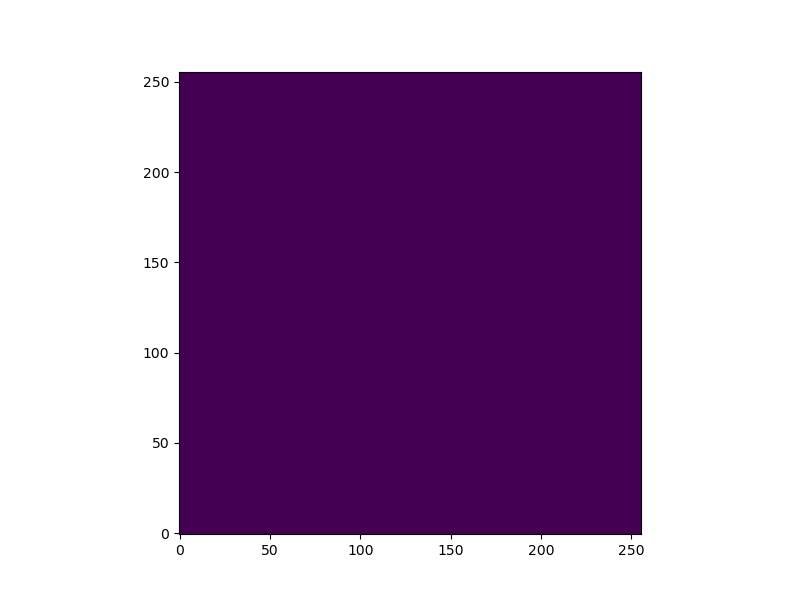

In [143]:
# Animate the result

fig, ax = plt.subplots(1,1, figsize=(8,6))
extent=[ -0.5*defines["D1"], (defines["N1"]-0.5)*defines["D1"],
    -0.5*defines["D0"], (defines["N0"]-0.5)*defines["D0"]]
img = ax.imshow(
    output[0,...], 
    extent=extent, 
    vmin=np.min(output), 
    vmax=np.max(output),
    #vmin=0,
    #vmax=10000000000000000000000000000000000.0,
    origin="lower"
)

def init():
    img.set_data(output[100,...])
    return img,

def update(n):
    img.set_data(output[n,...])
    return img,

#movie = FuncAnimation(
#    fig, 
#    update, 
#    frames=np.int32(np.linspace(0, output.shape[0], 1)),
#    init_func=init, 
#    blit=True
#)
init()

plt.show()